## ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [1]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [2]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
# torch
import torch 

In [4]:
# ÌèâÍ∞ÄÏßÄÌëú
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [5]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [6]:
# font manager
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# tqdm
from tqdm import tqdm

In [8]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [9]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("ÏÇ¨Ïö©Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§:", device)

ÏÇ¨Ïö©Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§: cuda


In [10]:
print("CUDA ÏÇ¨Ïö© Í∞ÄÎä•?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("ÏÇ¨Ïö© Ï§ëÏù∏ GPU:", torch.cuda.get_device_name(0))
else:
    print("GPUÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

CUDA ÏÇ¨Ïö© Í∞ÄÎä•? True
ÏÇ¨Ïö© Ï§ëÏù∏ GPU: NVIDIA GeForce MX450


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
import re

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [17]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:12
     ---------------------------------------- 0.1/12.8 MB 1.0 MB/s eta 0:00:13
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.3/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Data Load

In [82]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\wonny\OneDrive\Î¨∏ÏÑú\Ïπ¥Ïπ¥Ïò§ÌÜ° Î∞õÏùÄ ÌååÏùº\movie 10000.csv"

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv(file_path)

In [83]:
df.head()

video_id                                              title  \
0  8kggT2ej-lo                 Would You Pet a Cheetah in Africa?   
1  H42zWaD4A4s  The World's Highest Security Prison: CECOT (Th...   
2  aNUYGRn3W9Q                   COBRA GYPSIES - Full Documentary   
3  0UJYYkK4d8s  June 6, 1944 ‚Äì The Light of Dawn | History - D...   
4  XmtXC_n6X6Q  Our Planet | From Deserts to Grasslands | FULL...   

      channel_title  category_id  \
0           MrBeast           24   
1        Ruhi √áenet           27   
2     Raphael Treza            1   
3  Best Documentary           25   
4           Netflix           24   

                                                tags      views     likes  \
0                                             [none]  816300646  27859737   
1  ruhi √ßenet|ruhi cenet|documentary|ruhi cenet d...  112036494   2009246   
2  Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...   56065571    333002   
3  WWII|war|operation overlord|world war II|norma...   53961215    326635   
4  education|netflix education|documentary|our pl...   42082072    229371   

   dislikes  comment_count                                  thumbnail_link  \
0         0          39299  https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg   
1         0          67146  https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg   
2         0          31177  https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg   
3         0          16146  https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg   
4         0           7689  https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg   

    date           keyword  
0   1.05  documentary film  
1   9.02  documentary film  
2  28.02  documentary film  
3  18.02  documentary film  
4  17.04  documentary film

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        9350 non-null   object 
 1   title           9350 non-null   object 
 2   channel_title   9350 non-null   object 
 3   category_id     9350 non-null   int64  
 4   tags            9350 non-null   object 
 5   views           9350 non-null   int64  
 6   likes           9350 non-null   int64  
 7   dislikes        9350 non-null   int64  
 8   comment_count   9350 non-null   int64  
 9   thumbnail_link  9350 non-null   object 
 10  date            9350 non-null   float64
 11  keyword         9350 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 876.7+ KB


## Data preprocessing

### function definition

In [85]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()

    # 2. ÌäπÏàòÎ¨∏Ïûê, Ïà´Ïûê Ï†úÍ±∞
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy ÌòïÌÉúÏÜå Î∂ÑÏÑù
    doc = nlp(text)

    # 4. Î™ÖÏÇ¨/ÌòïÏö©ÏÇ¨ + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + ÏõêÌòï Î≥µÏõê
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)


In [86]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()

    # 2. ÌäπÏàòÎ¨∏Ïûê, Ïà´Ïûê Ï†úÍ±∞ (ÏïåÌååÎ≤≥Îßå ÎÇ®ÍπÄ)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy Î∂ÑÏÑù
    doc = nlp(text)

    # 4. Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + Î™ÖÏÇ¨/ÌòïÏö©ÏÇ¨ + ÏõêÌòï Î≥µÏõê
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [87]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [88]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # ÍµêÏßëÌï©
    return ' '.join(common) if common else ''

### target scaling

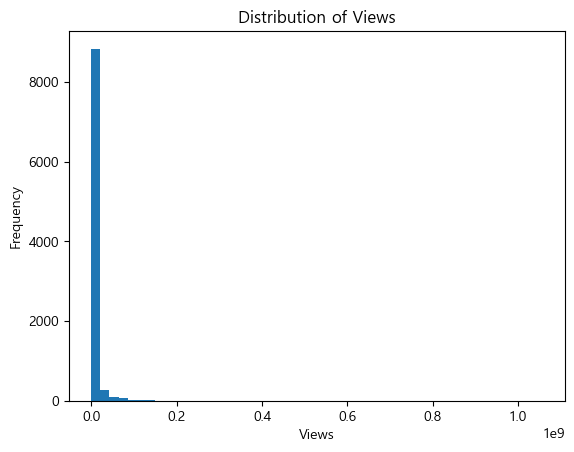

In [89]:
# target Î∂ÑÌè¨ ÌôïÏù∏ 
plt.hist(df['views'], bins=50)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

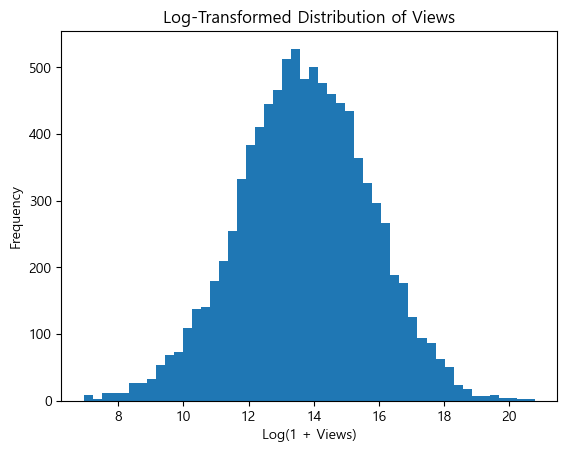

In [90]:
# target log scaling 
df['log_views'] = np.log1p(df['views'])

plt.hist(df['log_views'], bins=50)
plt.xlabel('Log(1 + Views)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Views')
plt.show()

In [91]:
# log_views Ïó¥ÏùÑ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
df['log_views_scaled'] = scaler.fit_transform(df[['log_views']])

In [92]:
plt.hist(df['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

### Ï†úÎ™© Ï†ÑÏ≤òÎ¶¨ 

In [93]:
df['cleaned_title'] = df['title'].apply(preprocess_title)

In [94]:
df.head(5)

video_id                                              title  \
0  8kggT2ej-lo                 Would You Pet a Cheetah in Africa?   
1  H42zWaD4A4s  The World's Highest Security Prison: CECOT (Th...   
2  aNUYGRn3W9Q                   COBRA GYPSIES - Full Documentary   
3  0UJYYkK4d8s  June 6, 1944 ‚Äì The Light of Dawn | History - D...   
4  XmtXC_n6X6Q  Our Planet | From Deserts to Grasslands | FULL...   

      channel_title  category_id  \
0           MrBeast           24   
1        Ruhi √áenet           27   
2     Raphael Treza            1   
3  Best Documentary           25   
4           Netflix           24   

                                                tags      views     likes  \
0                                             [none]  816300646  27859737   
1  ruhi √ßenet|ruhi cenet|documentary|ruhi cenet d...  112036494   2009246   
2  Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...   56065571    333002   
3  WWII|war|operation overlord|world war II|norma...   53961215    326635   
4  education|netflix education|documentary|our pl...   42082072    229371   

   dislikes  comment_count                                  thumbnail_link  \
0         0          39299  https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg   
1         0          67146  https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg   
2         0          31177  https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg   
3         0          16146  https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg   
4         0           7689  https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg   

    date           keyword  log_views  log_views_scaled  \
0   1.05  documentary film  20.520293          3.379239   
1   9.02  documentary film  18.534335          2.392694   
2  28.02  documentary film  17.842032          2.048785   
3  18.02  documentary film  17.803776          2.029781   
4  17.04  documentary film  17.555132          1.906264   

                                       cleaned_title  
0                                 pet cheetah africa  
1         world high security prison cecot evil keep  
2                            cobra gypsy documentary  
3  june light dawn history dday world war ii docu...  
4            planet desert grassland episode netflix

### ÌíàÏÇ¨Î≥Ñ count

In [95]:
# Í∞Å Ï†úÎ™©ÏóêÏÑú ÌíàÏÇ¨Î≥Ñ Í∞úÏàò Ï∂îÏ∂ú
pos_df = df['title'].apply(count_pos).apply(pd.Series)

# Í∏∞Ï°¥ dfÏôÄ Ìï©ÏπòÍ∏∞
df = pd.concat([df, pos_df], axis=1)

In [96]:
df

video_id                                              title  \
0     8kggT2ej-lo                 Would You Pet a Cheetah in Africa?   
1     H42zWaD4A4s  The World's Highest Security Prison: CECOT (Th...   
2     aNUYGRn3W9Q                   COBRA GYPSIES - Full Documentary   
3     0UJYYkK4d8s  June 6, 1944 ‚Äì The Light of Dawn | History - D...   
4     XmtXC_n6X6Q  Our Planet | From Deserts to Grasslands | FULL...   
...           ...                                                ...   
9345  fI1Fqh31hmU  Common worries among us... #moving #k-drama #D...   
9346  5hUnB3hhM4o    Î¨¥Îπô Íµ¨Î£°Ìè¨ Î∂àÏ£ºÎ®πÏúºÎ°ú 100ÎåÄ1 Ïã∏ÏõÄ ÌèºÎØ∏Ï≥§Îã§ #moving #ÎîîÏ¶àÎãàÌîåÎü¨Ïä§ #Î•òÏäπÎ£°   
9347  G8sZMYIwCCA      ·ÑÄ·Öµ·Ü∑·Ñâ·Ö•·Üº·ÑÄ·Ö≤·Ü´, ÏïÑÏù¥Ïñ∏Îß® Ï†ÄÎ¶¨Í∞ÄÎùº Í∞ïÎ†¨Ìïú ÌååÏõå Ï∞©ÏßÄ #·ÑÜ·ÖÆ·Ñá·Öµ·Üº(MOVING)   
9348  dF_QjuSWjGM        2024 Ïó∞Í∑π 'ÏóîÏ†§Ïä§ Ïù∏ ÏïÑÎ©îÎ¶¨Ïπ¥' MOVING POSTER - Î°úÏù¥ Ïù¥Ìö®Ï†ï   
9349  HNo80U8q8G4  "The Brave Pigeon: A Heroic Act on a Moving Tr...   

             channel_title  category_id  \
0                  MrBeast           24   
1               Ruhi √áenet           27   
2            Raphael Treza            1   
3         Best Documentary           25   
4                  Netflix           24   
...                    ...          ...   
9345                 K-D-M           22   
9346       ÏàèÏî®ÎÑ§(short cine)            1   
9347  KOREA VIBE | ÏΩîÎ¶¨ÏïÑ Î∞îÏù¥Î∏å           24   
9348                 Í∏ÄÎ¶ºÏª¥ÌçºÎãà           22   
9349            EXP MANSA            24   

                                                   tags      views     likes  \
0                                                [none]  816300646  27859737   
1     ruhi √ßenet|ruhi cenet|documentary|ruhi cenet d...  112036494   2009246   
2     Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...   56065571    333002   
3     WWII|war|operation overlord|world war II|norma...   53961215    326635   
4     education|netflix education|documentary|our pl...   42082072    229371   
...                                                 ...        ...       ...   
9345  #King the Land|#Lee Junho|#Im Yoona|#Go Wonhee...       1108        51   
9346                               disney+|Î¨¥Îπô2|Íµ¨Î£°Ìè¨|Î¨¥ÎπôÏï°ÏÖò       1122         8   
9347  ÌïúÎ•òÌÉÄÏûÑÏ¶à|Îâ¥Ïä§|ÌïúÎ•ò|hanryu|ÏïÑÏù¥Îèå|Ìå¨Ìà¨|fantoo|hanryutimes|k...       1033        18   
9348                                             [none]       1046        47   
9349          cartoon video viral shorts video trending       2538        25   

      dislikes  comment_count                                  thumbnail_link  \
0            0          39299  https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg   
1            0          67146  https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg   
2            0          31177  https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg   
3            0          16146  https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg   
4            0           7689  https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg   
...        ...            ...                                             ...   
9345         0             11  https://i.ytimg.com/vi/fI1Fqh31hmU/default.jpg   
9346         0              0  https://i.ytimg.com/vi/5hUnB3hhM4o/default.jpg   
9347         0              0  https://i.ytimg.com/vi/G8sZMYIwCCA/default.jpg   
9348         0              3  https://i.ytimg.com/vi/dF_QjuSWjGM/default.jpg   
9349         0              0  https://i.ytimg.com/vi/HNo80U8q8G4/default.jpg   

      ...           keyword  log_views  log_views_scaled  \
0     ...  documentary film  20.520293          3.379239   
1     ...  documentary film  18.534335          2.392694   
2     ...  documentary film  17.842032          2.048785   
3     ...  documentary film  17.803776          2.029781   
4     ...  documentary film  17.555132          1.906264   
...   ...               ...        ...               ...   
9345  ...      moving movie   7.011214         -3.33153

### Ï°∞ÌöåÏàò ÏÉÅÏúÑ ÏòÅÏÉÅÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÌôïÏù∏

--------------------------------------------------------------------------------------------------------

Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄ ÏòÅÏÉÅÎì§ÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÌôïÏù∏ÌïòÍ∏∞ (tf-idf)

In [97]:
# Ï°∞ÌöåÏàò Í∏∞Ï§Ä ÏÉÅÏúÑ ÏòÅÏÉÅ vs ÌïòÏúÑ ÏòÅÏÉÅ ÎπÑÍµê 
top_df = df[df['views'] >= df['views'].quantile(0.90)].copy()
bottom_df = df[df['views'] >= df['views'].quantile(0.10)].copy()

In [98]:
## tf-idf
# Î≤°ÌÑ∞Ìôî Í∞ùÏ≤¥ ÏÉùÏÑ±
vectorizer = TfidfVectorizer(
    stop_words='english',      # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    max_features=1000,         # ÏÉÅÏúÑ 5000Í∞úÏùò Îã®Ïñ¥Îßå ÏÇ¨Ïö©
    ngram_range=(1, 2)         # unigram + bigram ÏÇ¨Ïö©
)

In [99]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

In [100]:
# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(30))

             word      score
511         movie  64.819116
813         short  48.342396
167        comedy  35.373153
287         funny  24.729613
333         hindi  21.968784
3          action  20.932666
272          film  20.341564
792         scene  18.223394
936         video  17.067586
321            hd  16.227666
634      official  15.215428
606       netflix  15.094661
309          good  14.985718
955           war  14.747840
346        horror  14.523768
436          love  14.102374
39      animation  13.766009
213           dub  13.230482
767      romantic  12.457904
611           new  12.446458
336     hindi dub  12.153340
7    action movie  11.939159
589         music  10.505418
848          song   9.918649
943         viral   9.668175
209         drama   9.486347
919         trend   9.335196
853         south   9.109077
388        kdrama   8.998847
916       trailer   8.798194


-----------------------------------------------------------------------------------------------------------

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∂úÌòÑ ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Îã®Ïñ¥Îì§ ÌôïÏù∏ÌïòÍ∏∞ (countvectorizer) 

In [101]:
#CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(top_df['cleaned_title']) 

# Îã®Ïñ¥Î≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
word_counts = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Ï†ïÎ¶¨
count_df = pd.DataFrame({'word': words, 'count': word_counts})
count_df = count_df.sort_values('count', ascending=False)

In [102]:
count_df[count_df['count']>50]

word  count
619   movie    509
788   short    275
162  comedy    177
406   hindi    127
286   funny    102
16   action     97
384      hd     72
268    film     68
765   scene     65
221     dub     63
930   video     61
639     new     57
318    good     53
947     war     52
561    love     51

----------------------------------------------------------------------------------------------------------

In [103]:
keywords = [
        
]

pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

df['has_rank_related'] = df['title'].str.lower().str.contains(pattern)

In [104]:
df['has_rank_related'].sum()

np.int64(9350)

### Ï°∞ÌöåÏàò ÏÉÅÏúÑ / ÌïòÏúÑ ÏòÅÏÉÅ ÎπÑÍµê 

In [105]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(30))

          word  score
619      movie    509
788      short    275
162     comedy    177
406      hindi    127
286      funny    102
16      action     97
384         hd     72
268       film     68
765      scene     65
221        dub     63
930      video     61
639        new     57
318       good     53
947        war     52
561       love     51
430     horror     49
638    netflix     47
649   official     47
739   romantic     43
54   animation     42
815      south     39
903      trend     35
936      viral     33
811       song     32
627      music     32
218      drama     29
107  bollywood     27
888   thriller     26
652        old     25
901    trailer     24


In [106]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(bottom_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(30))

            word  score
582        movie   7457
782        short   1510
379        hindi   1164
721       review   1012
348         good   1005
4         action    969
304         film    727
607          new    679
389       horror    655
169       comedy    622
897     thriller    584
249          dub    565
964          war    508
514         love    505
816        south    500
366           hd    419
246        drama    417
269      english    410
734     romantic    395
837        story    369
506         list    361
623          old    347
755        scifi    300
968        watch    298
106    bollywood    297
477       korean    293
750        scene    277
412       indian    265
236  documentary    263
946        video    262


### clustering

In [124]:
## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ 
titles = df['cleaned_title']

#TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

#Îã®Ïñ¥ Î≤°ÌÑ∞ Ï∂îÏ∂ú (Î¨∏ÏÑú-Îã®Ïñ¥ ÌñâÎ†¨ Ï†ÑÏπò ‚Üí Îã®Ïñ¥ x Î¨∏ÏÑú ÌñâÎ†¨)
X_words = X_tfidf.T

#KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
n_clusters = 3  # Íµ∞Ïßë ÏàòÎäî Ïã§ÌóòÌïòÎ©¥ÏÑú Ï°∞Ï†ï Í∞ÄÎä•
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
word_labels = kmeans.fit_predict(X_words)

#ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ïÎ¶¨
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

#ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏ ÌôïÏù∏
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

#ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îã®Ïñ¥ Ï∂úÎ†•
for idx, row in cluster_groups.iterrows():
    print(f"üìå Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)

üìå Cluster 0:
documentary, documentary film, film, movie, scifi, scifi movie, short, war
--------------------------------------------------
üìå Cluster 1:
aamir, aamir khan, ace, achilldayinmylife, achilldayinmylife adayinmylife, achilldayinmylife documentary, action, action adventure, action film, action movie, action new, action romantic, action scifi, action thriller, action war, actionmovie, actor, adayinmylife, adayinmylife achilldayinmylife, adayinmylife documentary, advani, adventure, adventure movie, agent, ai, aishwarya, ajay, ajay devgn, akshay, akshay kumar, ali, alia, alien, allu, allu arjun, alur, alur cerita, amazing, amazon, amazon prime, america, amitabh, amitabh bachchan, amrish, anand, animal, animate, animate movie, animate short, animation, animation movie, animation short, anime, anime movie, arjun, army, attack, attitude, aur, avenger, award, babu, baby, bachchan, bad, bad superhero, bangla, bangla explanation, base, base true, batman, battle, bbc, bear, beauti

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import pandas as pd

# 1. TF-IDF Î≤°ÌÑ∞Ìôî
titles = df['cleaned_title']

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

# 2. Îã®Ïñ¥ Î≤°ÌÑ∞ (Î¨∏ÏÑú-Îã®Ïñ¥ ÌñâÎ†¨ ‚Üí Ï†ÑÏπò)
X_words = X_tfidf.T.toarray()  # sparse ‚Üí dense

# 3. DBSCAN ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
dbscan = DBSCAN(eps=0.6, min_samples=2, metric='cosine')  # Í±∞Î¶¨ Í∏∞Î∞òÏùÄ cosine Ï∂îÏ≤ú
word_labels = dbscan.fit_predict(X_words)

# 4. Í≤∞Í≥º Ï†ïÎ¶¨
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

# 5. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îã®Ïñ¥ Ï∂úÎ†•
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

for idx, row in cluster_groups.iterrows():
    print(f"üìå Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)


üìå Cluster -1:
ace, action adventure, action film, action romantic, action scifi, action thriller, action war, actor, agent, ai, aishwarya, ali, alien, amazing, america, anand, animal, animation short, army, attack, attitude, aur, avenger, away, baby, batman, battle, bbc, bear, beautiful, begin, bhojpuri, billionaire, black, blockbuster hindi, boss, box, boy, brahmanandam, break, broadway, brother, brutal, bt, bully, cartoon animation, case, castle, cat, cdrama, ceo, challenge, change, channel, character, child, chinesedrama, chopra, chris, cinta, city, collection, college, come, comedy film, comedy funny, comedy scene, comedy short, comedyfilm, comedyvideo, compilation, complete, couple, crazy, creature, creepy, crime movie, cut, cute, dan, dance, dangerous, dark, david, day, dc, dead, deadly, deadpool, death, dharmendra, di, dialogue, die, dil, dinosaur, director, disney, disney movie, disneyplus, doctor, dog, doll, door, doraemon, dragon, drama explain, drama korea, dream, dub act

In [134]:
#Ï†úÎ™©, Îã®Ïñ¥ ÌÅ¥Îü¨Ïä§ÌÑ∞, Ï°∞ÌöåÏàò Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
titles = df['cleaned_title'].astype(str).tolist()
views = df['views'].tolist()
word_cluster_map = dict(zip(cluster_df['word'], cluster_df['cluster']))  # Îã®Ïñ¥ ‚Üí ÌÅ¥Îü¨Ïä§ÌÑ∞Î≤àÌò∏

#Ï†úÎ™©Î≥Ñ Ìè¨Ìï®Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Î™©Î°ù ÎßåÎì§Í∏∞
title_clusters = []

for title in titles:
    found_clusters = set()
    for word in word_cluster_map:
        if word in title:
            found_clusters.add(word_cluster_map[word])
    title_clusters.append(list(found_clusters))

#Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏ Í∏∞Ï§ÄÏúºÎ°ú Ìï¥ÎãπÎêòÎäî Ï°∞ÌöåÏàò Î™®ÏúºÍ∏∞
cluster_to_views = {}

for clusters, view in zip(title_clusters, views):
    for c in clusters:
        if c not in cluster_to_views:
            cluster_to_views[c] = []
        cluster_to_views[c].append(view)

#ÌèâÍ∑† Ï°∞ÌöåÏàò Í≥ÑÏÇ∞
cluster_avg_views = {
    c: np.mean(vlist) for c, vlist in cluster_to_views.items() if len(vlist) > 0
}

#Í≤∞Í≥º Ï∂úÎ†•
for c, avg in sorted(cluster_avg_views.items()):
    print(f"üìä Cluster {c} - ÌèâÍ∑† Ï°∞ÌöåÏàò: {round(avg):,}Ìöå")

üìä Cluster -1 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 5,954,226Ìöå
üìä Cluster 0 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 1,264,888Ìöå
üìä Cluster 1 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 2,985,644Ìöå
üìä Cluster 2 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 4,572,668Ìöå
üìä Cluster 3 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 3,276,058Ìöå
üìä Cluster 4 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 3,342,268Ìöå
üìä Cluster 5 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 2,701,475Ìöå
üìä Cluster 6 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 4,810,114Ìöå
üìä Cluster 7 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 8,017,301Ìöå
üìä Cluster 8 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 2,113,981Ìöå
üìä Cluster 9 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 6,995,733Ìöå
üìä Cluster 10 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 1,414,138Ìöå
üìä Cluster 11 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 1,687,405Ìöå
üìä Cluster 12 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 6,248,407Ìöå
üìä Cluster 13 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 5,594,603Ìöå
üìä Cluster 14 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 10,187,695Ìöå
üìä Cluster 15 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 8,769,664Ìöå
üìä Cluster 16 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 6,675,996Ìöå
üìä Cluster 17 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 5,276,333Ìöå
üìä Cluster 18 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 3,716,830Ìöå
üìä Cluster 19 - ÌèâÍ∑† Ï°∞Ì

In [131]:
from sklearn.metrics import silhouette_score

for eps in [0.2, 0.3, 0.4, 0.5, 0.6]:
    for min_pts in [2, 3, 5]:
        db = DBSCAN(eps=eps, min_samples=min_pts, metric='cosine')
        labels = db.fit_predict(X_words)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f"eps={eps}, min_samples={min_pts} ‚Üí clusters: {n_clusters}, noise: {n_noise}")


eps=0.2, min_samples=2 ‚Üí clusters: 67, noise: 835
eps=0.2, min_samples=3 ‚Üí clusters: 23, noise: 923
eps=0.2, min_samples=5 ‚Üí clusters: 2, noise: 989
eps=0.3, min_samples=2 ‚Üí clusters: 90, noise: 772
eps=0.3, min_samples=3 ‚Üí clusters: 33, noise: 886
eps=0.3, min_samples=5 ‚Üí clusters: 3, noise: 983
eps=0.4, min_samples=2 ‚Üí clusters: 114, noise: 705
eps=0.4, min_samples=3 ‚Üí clusters: 42, noise: 849
eps=0.4, min_samples=5 ‚Üí clusters: 5, noise: 971
eps=0.5, min_samples=2 ‚Üí clusters: 137, noise: 621
eps=0.5, min_samples=3 ‚Üí clusters: 58, noise: 779
eps=0.5, min_samples=5 ‚Üí clusters: 10, noise: 940
eps=0.6, min_samples=2 ‚Üí clusters: 151, noise: 534
eps=0.6, min_samples=3 ‚Üí clusters: 77, noise: 682
eps=0.6, min_samples=5 ‚Üí clusters: 15, noise: 895


### Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò

In [109]:
# Îã®Ïñ¥ Ïàò Í≥ÑÏÇ∞
df['title_cnt'] = df['cleaned_title'].apply(lambda x: len(x.split()))

# ÌôïÏù∏
df.head(5)

video_id                                              title  \
0  8kggT2ej-lo                 Would You Pet a Cheetah in Africa?   
1  H42zWaD4A4s  The World's Highest Security Prison: CECOT (Th...   
2  aNUYGRn3W9Q                   COBRA GYPSIES - Full Documentary   
3  0UJYYkK4d8s  June 6, 1944 ‚Äì The Light of Dawn | History - D...   
4  XmtXC_n6X6Q  Our Planet | From Deserts to Grasslands | FULL...   

      channel_title  category_id  \
0           MrBeast           24   
1        Ruhi √áenet           27   
2     Raphael Treza            1   
3  Best Documentary           25   
4           Netflix           24   

                                                tags      views     likes  \
0                                             [none]  816300646  27859737   
1  ruhi √ßenet|ruhi cenet|documentary|ruhi cenet d...  112036494   2009246   
2  Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...   56065571    333002   
3  WWII|war|operation overlord|world war II|norma...   53961215    326635   
4  education|netflix education|documentary|our pl...   42082072    229371   

   dislikes  comment_count                                  thumbnail_link  \
0         0          39299  https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg   
1         0          67146  https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg   
2         0          31177  https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg   
3         0          16146  https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg   
4         0           7689  https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg   

   ...  log_views_scaled                                      cleaned_title  \
0  ...          3.379239                                 pet cheetah africa   
1  ...          2.392694         world high security prison cecot evil keep   
2  ...          2.048785                            cobra gypsy documentary   
3  ...          2.029781  june light dawn history dday world war ii docu...   
4  ...          1.906264            planet desert grassland episode netflix   

   NOUN  PROPN ADJ  VERB  INTJ  NUM  has_rank_related  title_cnt  
0     1      1   0     1     0    0              True          3  
1     4      1   2     1     0    0              True          7  
2     3      0   1     0     0    0              True          3  
3     7      3   0     0     0    3              True          9  
4     6      0   1     0     0    0              True          5  

[5 rows x 23 columns]

In [110]:
# Ï†úÎ™© Í∏∏Ïù¥ Í≥ÑÏÇ∞ 
df['title_len'] = df['title'].apply(lambda x: len(x))

# ÌôïÏù∏
df.head(5)

video_id                                              title  \
0  8kggT2ej-lo                 Would You Pet a Cheetah in Africa?   
1  H42zWaD4A4s  The World's Highest Security Prison: CECOT (Th...   
2  aNUYGRn3W9Q                   COBRA GYPSIES - Full Documentary   
3  0UJYYkK4d8s  June 6, 1944 ‚Äì The Light of Dawn | History - D...   
4  XmtXC_n6X6Q  Our Planet | From Deserts to Grasslands | FULL...   

      channel_title  category_id  \
0           MrBeast           24   
1        Ruhi √áenet           27   
2     Raphael Treza            1   
3  Best Documentary           25   
4           Netflix           24   

                                                tags      views     likes  \
0                                             [none]  816300646  27859737   
1  ruhi √ßenet|ruhi cenet|documentary|ruhi cenet d...  112036494   2009246   
2  Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...   56065571    333002   
3  WWII|war|operation overlord|world war II|norma...   53961215    326635   
4  education|netflix education|documentary|our pl...   42082072    229371   

   dislikes  comment_count                                  thumbnail_link  \
0         0          39299  https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg   
1         0          67146  https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg   
2         0          31177  https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg   
3         0          16146  https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg   
4         0           7689  https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg   

   ...                                      cleaned_title NOUN  PROPN  ADJ  \
0  ...                                 pet cheetah africa    1      1    0   
1  ...         world high security prison cecot evil keep    4      1    2   
2  ...                            cobra gypsy documentary    3      0    1   
3  ...  june light dawn history dday world war ii docu...    7      3    0   
4  ...            planet desert grassland episode netflix    6      0    1   

  VERB  INTJ  NUM  has_rank_related  title_cnt  title_len  
0    1     0    0              True          3         34  
1    1     0    0              True          7         72  
2    0     0    0              True          3         32  
3    0     0    3              True          9         77  
4    0     0    0              True          5         64  

[5 rows x 24 columns]

-----------------------------------------------------------------------------------------------------------

Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥ÑÎ°ú ÌèâÍ∑†Í∞íÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏

In [111]:
# Íµ¨Í∞Ñ 5Íµ¨Í∞ÑÏúºÎ°ú Î∂ÑÌï† 
df['views_bin'] = pd.qcut(df['views'], q=3, labels=[1,2,3])

In [112]:
grouped = df.groupby('views_bin').agg({
    'title_cnt': 'mean',
    'views': 'mean',
    'title_cnt' : 'mean',
    'title_len' : 'mean'
}).reset_index()

print(grouped)

  views_bin  title_cnt         views  title_len
0         1   7.740135  1.529646e+05  71.460058
1         2   7.906290  1.038253e+06  70.801027
2         3   7.957010  1.727149e+07  71.756817


C:\Users\wonny\AppData\Local\Temp\ipykernel_2280\1109606012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('views_bin').agg({


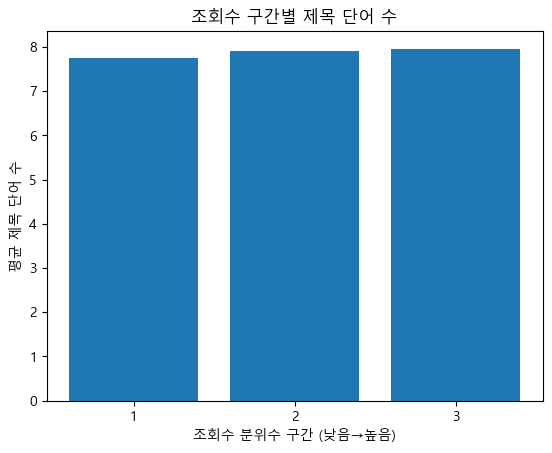

In [113]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_cnt'])
plt.xlabel('Ï°∞ÌöåÏàò Î∂ÑÏúÑÏàò Íµ¨Í∞Ñ (ÎÇÆÏùå‚ÜíÎÜíÏùå)')
plt.ylabel('ÌèâÍ∑† Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.title('Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.show()

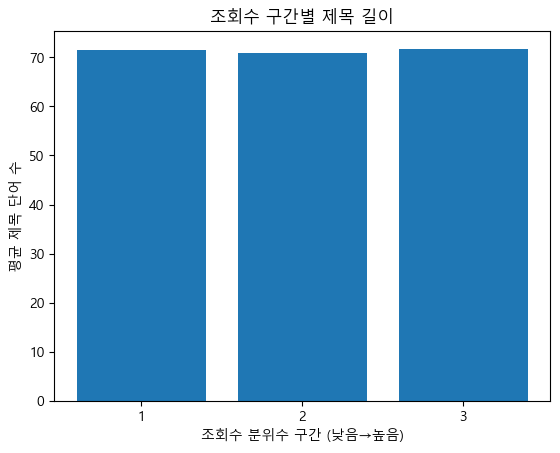

In [114]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_len'])
plt.xlabel('Ï°∞ÌöåÏàò Î∂ÑÏúÑÏàò Íµ¨Í∞Ñ (ÎÇÆÏùå‚ÜíÎÜíÏùå)')
plt.ylabel('ÌèâÍ∑† Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.title('Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Í∏∏Ïù¥')
plt.show()

In [64]:
# Î∂ÑÏúÑÏàò Íµ¨Í∞ÑÎ≥ÑÎ°ú title_cnt Î∂ÑÎ¶¨
group1 = df[df['views_bin'] == 1]['title_cnt']
group2 = df[df['views_bin'] == 2]['title_cnt']
group3 = df[df['views_bin'] == 3]['title_cnt']

# ANOVA ÌÖåÏä§Ìä∏
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

NameError: name 'f_oneway' is not defined

### descriptionÍ≥º titleÏóê Í≤πÏπòÎäî Îã®Ïñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏

In [153]:
game_df

title     views   likes  \
131                 L.A. Noire - Nintendo Switch Trailer    154872    7683   
392                 L.A. Noire - Nintendo Switch Trailer    161231    7803   
405                                       Our First Date    224426   17784   
619                                       Our First Date    463992   25840   
652                         Playing CUPHEAD with MatPat!     55460    3871   
...                                                  ...       ...     ...   
40874  Pok√©mon: Let's Go, Pikachu! and Pok√©mon: Let's...   9992803  230507   
40911        The Sims 4 Seasons: Official Reveal Trailer   1749832   77408   
40919  The History of Fortnite Battle Royale - Did Yo...    324219    7840   
40936              LIE DETECTOR TEST WITH MY GIRLFRIEND!   3229540  109945   
40948  Official Call of Duty¬Æ: Black Ops 4 ‚Äî¬†Multipla...  10306119  357079   

                                             description  log_views  \
131    Amid the post-war boom of Hollywood's Golden A...  11.950361   
392    Amid the post-war boom of Hollywood's Golden A...  11.990600   
405    Here's an animation short of our First Date! W...  12.321306   
619    Here's an animation short of our First Date! W...  13.047625   
652    After my appearance on GTLive, MatPat (Game Th...  10.923435   
...                                                  ...        ...   
40874  Return to the Kanto region and experience a cl...  16.117376   
40911  Add weather to your Sims‚Äô lives to tell new st...  14.375031   
40919  Thanks to Skillshare for sponsoring this video...  12.689178   
40936  Talia: https://www.youtube.com/user/nataliahad...  14.987851   
40948  Call of Duty: Black Ops 4 Multiplayer raises t...  16.148248   

       log_views_scaled                                      cleaned_title  \
131           -1.291706                   la noire nintendo switch trailer   
392           -1.265922                   la noire nintendo switch trailer   
405           -1.054013                                               date   
619           -0.588606                                               date   
652           -1.949735                                play cuphead matpat   
...                 ...                                                ...   
40874          1.378417        pokmon let pikachu pokmon let eevee trailer   
40911          0.261964                sims season official reveal trailer   
40919         -0.818290  history fortnite battle royale know game feat ...   
40936          0.654644                       lie detector test girlfriend   
40948          1.398199  official duty black op multiplayer reveal trailer   

                                             cleand_desc  NOUN  PROPN  ADJ  \
131    postwar boom hollywood golden age cole phelp l...     2      4    0   
392    postwar boom hollywood golden age cole phelp l...     2      4    0   
405    here animation short date excited hear think l...     1      0    1   
619    here animation short date excited hear think l...     1      0    1   
652    appearance gtlive matpat game theory play cuph...     1      1    0   
...                                                  ...   ...    ...  ...   
40874  return kanto region experience classic pokmon ...     2      3    0   
40911  add weather sim live tell new story enjoy seas...     3      0    1   
40919  thank skillshare sponsor video people sign lin...     4      1    1   
40936  talia httpswwwyoutubecomusernataliahaddockjosh...     4      0    0   
40948  duty black op multiplayer raise bar famed mult...     6      0    2   

       VERB  INTJ  NUM  has_rank_related  title_cnt  title_len views_bin  
131       0     0    0              True          5         36         1  
392       0     0    0              True          5         36         1  
405       0     0    0             False          1         14         1  
619       0     0    0             False          1         14         1  
652 

In [155]:
# Í≤πÏπòÎäî Îã®Ïñ¥ ÌÉêÏÉâ
game_df['common_words'] = game_df.apply(extract_common_words, axis=1)

In [156]:
# Í∞úÏàòÍπåÏßÄ Í∞ôÏù¥ ÏÑ∏Í∏∞
game_df['n_common_words'] = game_df['common_words'].apply(lambda x: len(x.split()) if x else 0)

In [158]:
game_df['n_common_words']

131      4
392      4
405      1
619      1
652      2
        ..
40874    4
40911    0
40919    6
40936    0
40948    4
Name: n_common_words, Length: 817, dtype: int64

In [169]:
# Ï°∞ÌöåÏàò Íµ¨Í∞ÑÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ 
grouped = game_df.groupby('views_bin').agg({
    'views' : 'mean',
    'n_common_words': 'mean',
    'NOUN' : 'mean',
    'PROPN' : 'mean',
    'VERB' : 'mean',
    'INTJ' : 'mean',
    'NUM' : 'mean'
}).reset_index()

print(grouped)

  views_bin         views  n_common_words      NOUN     PROPN      VERB  INTJ  \
0         1  3.300992e+05        3.032967  2.604396  1.637363  0.769231   0.0   
1         2  1.630028e+06        2.338235  2.691176  1.073529  0.779412   0.0   
2         3  5.910787e+06        2.959559  3.474265  0.591912  0.852941   0.0   

        NUM  
0  0.472527  
1  0.352941  
2  0.312500  


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\2622363220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


-----------------------------------------------------------------------------------------------------------

### ÏµúÏ¢Ö ÏòàÏ∏°

------------------------------------------------------------------------------------------------------

ÌÇ§ÏõåÎìú ÏÇ¨Ï†Ñ Íµ¨Ï∂ï

In [65]:
# Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄ ÏòÅÏÉÅÏóê ÏûêÏ£º Îì±Ïû•ÌïòÎäî ÌÇ§ÏõåÎìú ÏÇ¨Ï†Ñ Íµ¨Ï∂ï 
keywords = [
    "movie", "short", "comedy", "funny", "hindi", "action", "netflix", "film",
    "animation", "horror", "scene", "official", "comedy short", "romantic",
    "video", "trend", "dub", "hd", "hindi dub"
]

hype_words = ['insane', 'crazy', 'unbelievable', 'god', '1v5', 'clutch']

ÌäπÏßï Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò

In [67]:
def extract_features(row):
    features = {}

    # ÏõêÎ≥∏ ÌÖçÏä§Ìä∏
    title = row['title'] if isinstance(row['title'], str) else ''

    # Ï†ÑÏ≤òÎ¶¨Îêú ÌÖçÏä§Ìä∏
    cleaned_title = preprocess_title(title)

    # Ï†úÎ™© Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä 
    keywords = [
    "movie", "short", "comedy", "funny", "hindi", "action", "netflix", "film",
    "animation", "horror", "scene", "official", "comedy short", "romantic",
    "video", "trend", "dub", "hd", "hindi dub"
]

    
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # ÎåÄÎ¨∏Ïûê ÎπÑÏú® 30% Ïù¥ÏÉÅ Ïó¨Î∂Ä
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # ÌíàÏÇ¨ Ïπ¥Ïö¥Ìä∏
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò

In [68]:
def compute_rule_score(features):
    score = 0

    # 1. Ï†úÎ™© Í∏∏Ïù¥: ÏßßÏùÑÏàòÎ°ù Í∞ÄÏÇ∞Ï†ê
    score += -0.03 * features['title_len']

    # 2. Îã®Ïñ¥ Ïàò: 
    score -= 0.3 * features['title_cnt']

    # 3. ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä
    score += 0.5 * features['has_number']

    # 5. Ïà´ÏûêÎ°ú ÏãúÏûë
    score -= 0.1 * features['starts_with_number']

    # 6. ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä
    score += 0.8 * features['has_keyword']

    # 7. ÎåÄÎ¨∏Ïûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Í≤ΩÏö∞
    score -= 0.3 * features['is_caps_heavy']

    # 8. ÌíàÏÇ¨ Í∏∞Î∞ò: Î™ÖÏÇ¨¬∑ÎèôÏÇ¨ ÎßéÏúºÎ©¥ ÎÇ¥Ïö© ÌíçÎ∂Ä, Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Ïò§ÌûàÎ†§ ÏùºÎ∞òÏÑ±‚Üì
    score += 0.8 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Í∞ÄÏ§ëÏπò ÎÇÆÏ∂§

    return score

Ïã§Ï†ú Ï†ÅÏö©Ìï† Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÇ¨Ïö©Ìï† ÏπºÎüºÎßå Î∂àÎü¨Ïò§Í∏∞

In [135]:
movie = df[['title', 'views']].copy()

ÌÉÄÍ≤ü Ïä§ÏºÄÏùºÎßÅ

In [136]:
# target scaling
movie['log_views'] = np.log1p(movie['views'])

scaler = StandardScaler()
movie['scaled_views'] = scaler.fit_transform(movie[['log_views']])

In [137]:
movie = movie.drop(columns = ['views', 'log_views'])
movie

title  scaled_views
0                    Would You Pet a Cheetah in Africa?      3.379239
1     The World's Highest Security Prison: CECOT (Th...      2.392694
2                      COBRA GYPSIES - Full Documentary      2.048785
3     June 6, 1944 ‚Äì The Light of Dawn | History - D...      2.029781
4     Our Planet | From Deserts to Grasslands | FULL...      1.906264
...                                                 ...           ...
9345  Common worries among us... #moving #k-drama #D...     -3.331537
9346    Î¨¥Îπô Íµ¨Î£°Ìè¨ Î∂àÏ£ºÎ®πÏúºÎ°ú 100ÎåÄ1 Ïã∏ÏõÄ ÌèºÎØ∏Ï≥§Îã§ #moving #ÎîîÏ¶àÎãàÌîåÎü¨Ïä§ #Î•òÏäπÎ£°     -3.325305
9347      ·ÑÄ·Öµ·Ü∑·Ñâ·Ö•·Üº·ÑÄ·Ö≤·Ü´, ÏïÑÏù¥Ïñ∏Îß® Ï†ÄÎ¶¨Í∞ÄÎùº Í∞ïÎ†¨Ìïú ÌååÏõå Ï∞©ÏßÄ #·ÑÜ·ÖÆ·Ñá·Öµ·Üº(MOVING)     -3.366322
9348        2024 Ïó∞Í∑π 'ÏóîÏ†§Ïä§ Ïù∏ ÏïÑÎ©îÎ¶¨Ïπ¥' MOVING POSTER - Î°úÏù¥ Ïù¥Ìö®Ï†ï     -3.360116
9349  "The Brave Pigeon: A Heroic Act on a Moving Tr...     -2.920065

[9350 rows x 2 columns]

In [138]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9350 non-null   object 
 1   scaled_views  9350 non-null   float64
dtypes: float64(1), object(1)
memory usage: 146.2+ KB


Ìï®Ïàò Ï†ÅÏö©

In [ ]:
movie['features'] = movie.apply(extract_features, axis=1)

In [ ]:
movie['rule_score'] = movie['features'].apply(compute_rule_score)

### (ÏòàÏ∏° 1) ÏßÄÏàòÌï®ÏàòÎ°ú ÏòàÏ∏°

In [ ]:
def score_to_views(score, base=1e5):
    return int(base * np.exp(score / 3))

In [ ]:
movie['predicted_views'] = movie['rule_score'].apply(score_to_views)

In [ ]:
movie[['title', 'scaled_views', 'rule_score', 'predicted_views']].sort_values(by='scaled_views', ascending=False).head()

In [ ]:
# ÏòàÏ∏°Í∞íÏùÑ log-scaling + standardizationÌïú Í≤ÉÍ≥º ÎßûÏ∂îÎ†§Î©¥:
pred_scaled = np.log1p(movie['predicted_views'])
pred_scaled = (pred_scaled - pred_scaled.mean()) / pred_scaled.std()

# Ïã§Ï†úÍ∞í
true_scaled = movie['scaled_views']

In [ ]:
rmse = mean_squared_error(movie['scaled_views'], pred_scaled, squared=False)
r2 = r2_score(true_scaled, pred_scaled)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

### (ÏòàÏ∏° 2) Linear Regression

In [ ]:
# X, y Ï†ïÏùò
X = movie[['rule_score']]  # ÎèÖÎ¶Ω Î≥ÄÏàò: rule Í∏∞Î∞ò Ï†êÏàò
y = movie['scaled_views']  # Ï¢ÖÏÜç Î≥ÄÏàò: log + ÌëúÏ§ÄÌôîÎêú Ï°∞ÌöåÏàò

# ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

Í∞ÄÏ§ëÏπò ÏàòÏ†ïÏùÑ ÏúÑÌïú ÌöåÍ∑ÄÍ≥ÑÏàò ÌôïÏù∏

In [ ]:
# ÌîºÏ≤ò Ï∂îÏ∂ú
features_df = game.apply(extract_features, axis=1, result_type='expand')

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y)
X = features_df.drop(columns = 'common_words', errors = 'ignore')  
y = game['scaled_views']

# Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÏÑ±Îä• ÌèâÍ∞Ä
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print("RMSE:", round(rmse, 4))
print("R¬≤:", round(r2, 4))

# Í≥ÑÏàò ÌôïÏù∏
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n Feature Importance (Í≥ÑÏàò):")
print(coefficients)

-----------------------------------------------------------------------------------------------------

Ï†êÏàò Í∞ÄÏ§ëÏπò ÏàòÏ†ï ÌõÑ Îã§Ïãú ÏòàÏ∏°

In [94]:
def compute_rule_score_modified(features):
    score = 0

    # 1. Ï†úÎ™© Í∏∏Ïù¥: ÏßßÏùÑÏàòÎ°ù Í∞ÄÏÇ∞Ï†ê
    score += 0.03 * features['title_len']

    # 2. Îã®Ïñ¥ Ïàò: Ï†ÅÏùÑÏàòÎ°ù ÌÅ¥Î¶≠ Ïú†ÎèÑ Í∞ÄÎä•ÏÑ± ÏûàÏùå
    score += 0.3 * features['title_cnt']

    # 3. ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    score -= 0.3 * features['num_exclamations']
    score -= 0.3 * features['num_questions']

    # 4. Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä
    score -= 0.7 * features['has_number']

    # 5. Ïà´ÏûêÎ°ú ÏãúÏûë
    score -= 0.8 * features['starts_with_number']

    # 6. ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä
    score -= 0.8 * features['has_keyword']

    # 7. ÎåÄÎ¨∏Ïûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Í≤ΩÏö∞
    score -= 0.3 * features['is_caps_heavy']

    # 8. ÌíàÏÇ¨ Í∏∞Î∞ò: Î™ÖÏÇ¨¬∑ÎèôÏÇ¨ ÎßéÏúºÎ©¥ ÎÇ¥Ïö© ÌíçÎ∂Ä, Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Ïò§ÌûàÎ†§ ÏùºÎ∞òÏÑ±‚Üì
    score += 0.7 * features.get('NOUN', 0)
    score += 0.7 * features.get('VERB', 0)
    score += 0.1 * features.get('PROPN', 0)  # Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Í∞ÄÏ§ëÏπò ÎÇÆÏ∂§

    return score

In [95]:
game['rule_score_modified'] = game['features'].apply(compute_rule_score_modified)

In [96]:
# X, y Ï†ïÏùò
X = game[['rule_score_modified']]  # ÎèÖÎ¶Ω Î≥ÄÏàò: rule Í∏∞Î∞ò Ï†êÏàò
y = game['scaled_views']  # Ï¢ÖÏÜç Î≥ÄÏàò: log + ÌëúÏ§ÄÌôîÎêú Ï°∞ÌöåÏàò

# ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

RMSE: 0.9943
R¬≤: 0.0114


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
